In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Jamnagar.csv')

In [4]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Hotel Aram,500,"North Indian,Chinese,Gujarati,South Indian",Jamnagar,Bedeswar,Casual Dining,"1130am to 3pm,7pm to 11pm(Mon-Sun)",Good,3.9,12
1,Hitulal Rajwadi Gola & Icecream,120,Ice Cream,Jamnagar,Rameshwar Nagar,Dessert Parlor,2pm to 11pm(Mon-Sun),Good,3.7,8
2,Amul Icecream Parlour,100,"Beverages,Desserts",Jamnagar,Kadiawad,Beverage Shop,11am to 11pm(Mon-Sun),Good,3.9,7
3,Tavaa Restaurant,250,North Indian,Jamnagar,Bedeswar,Casual Dining,1130am to 11pm(Mon-Sun),Very Good,4.3,57
4,Peter John's Pizza,300,North Indian,Jamnagar,Green City,Casual Dining,11am to 11pm(Mon-Sun),Good,3.8,26


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
Name                61 non-null object
Price               61 non-null int64
Cuisine_Category    61 non-null object
City                61 non-null object
Region              61 non-null object
Cuisine_Type        61 non-null object
Timing              61 non-null object
Rating_Types        61 non-null object
Rating              61 non-null float64
Votes               61 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 4.8+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [6]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [7]:
data.describe()

,Price,Rating,Votes
count,61.000000,61.000000,61.000000
mean,263.114754,3.754098,12.147541
std,128.147584,0.226255,10.089328
min,80.000000,3.300000,4.000000
25%,200.000000,3.600000,5.000000
50%,250.000000,3.800000,9.000000
75%,250.000000,3.900000,13.000000
max,800.000000,4.300000,57.000000


In [8]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [9]:
data.Name.value_counts().head()

Cafe Paradise Restaurant                   1
Two Fat Indian Multi Cuisine Restaurant    1
Amidhara Restaurant                        1
Zayka Restaurant                           1
Chicken Kuk Du Ku                          1
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [10]:
data['Region'].value_counts()[:10]

Bedeswar           43
Kadiawad            6
Kamdar Colony       5
Rameshwar Nagar     2
Ajanta Society      2
Gulab Nagar         1
Jawahar Nagar       1
Green City          1
Name: Region, dtype: int64

Text(0.5,1,'Region')

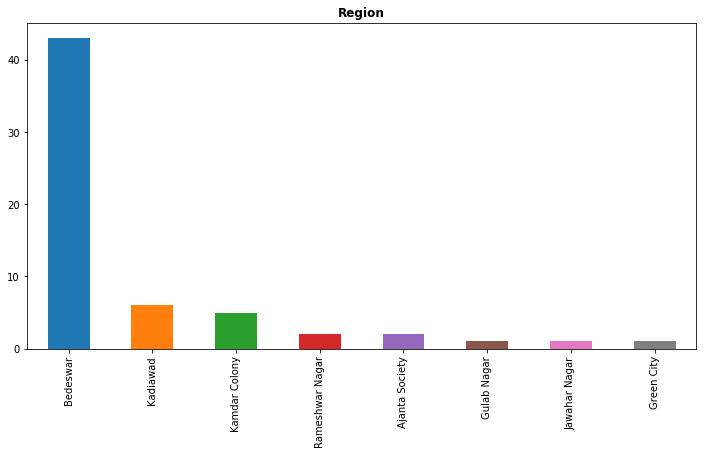

In [11]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

ValueError: 'explode' must be of length 'x'

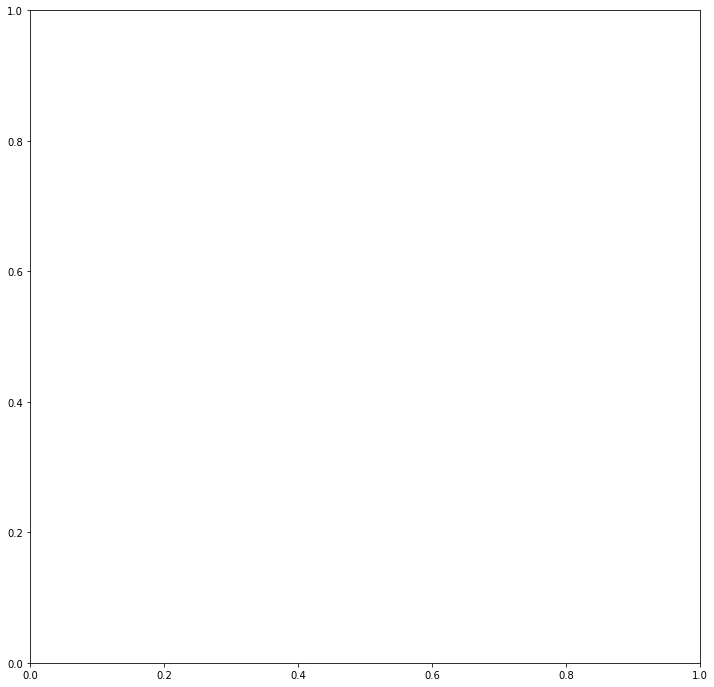

In [12]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [13]:
data['Rating_Types'].value_counts().head(10)

Good         44
Very Good    11
Average       6
Name: Rating_Types, dtype: int64

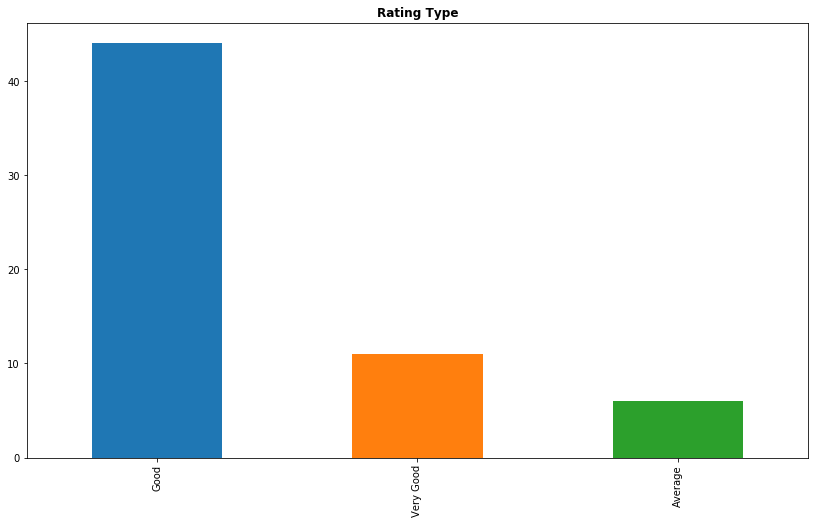

In [14]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [15]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       32
Casual Dining     13
none               5
Bakery             3
Dessert Parlor     2
Café               2
Sweet Shop         1
Paan Shop          1
Fine Dining        1
Beverage Shop      1
Name: Cuisine_Type, dtype: int64

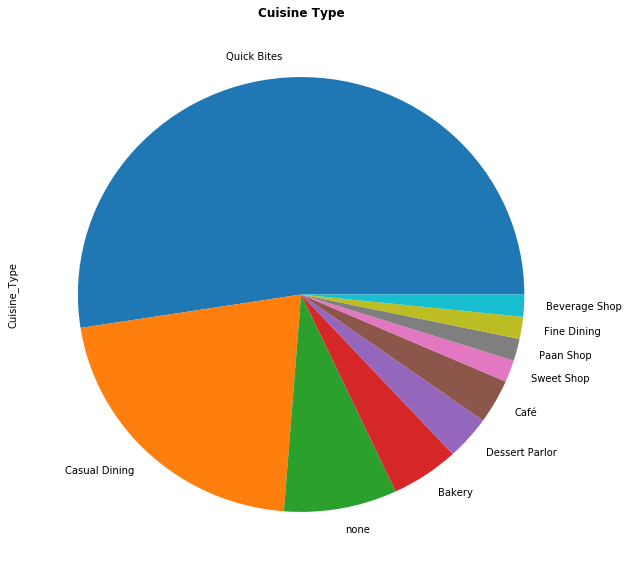

In [16]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [17]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [18]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [19]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.754098360655737


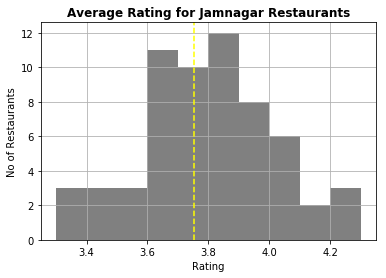

In [20]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Jamnagar Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [22]:
#Average rating per restaurant in Jamnagar is found to be around 3.7

# Top cuisines in Jamnagar

In [23]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

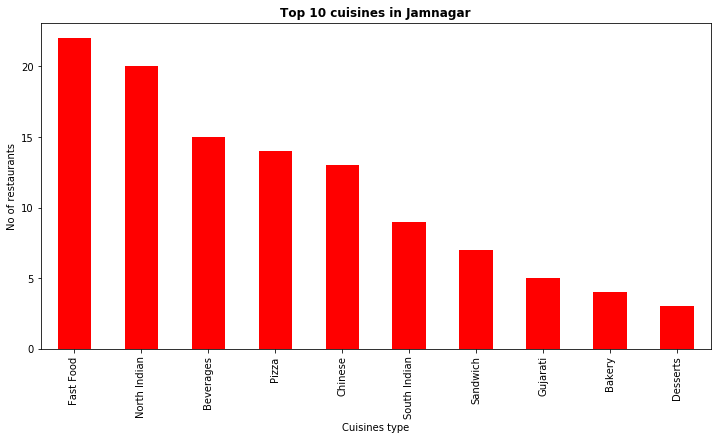

In [24]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Jamnagar',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [25]:
data['Price'].value_counts()[:20]

250    29
100     6
200     6
150     4
400     4
500     3
300     3
120     1
800     1
350     1
80      1
600     1
450     1
Name: Price, dtype: int64

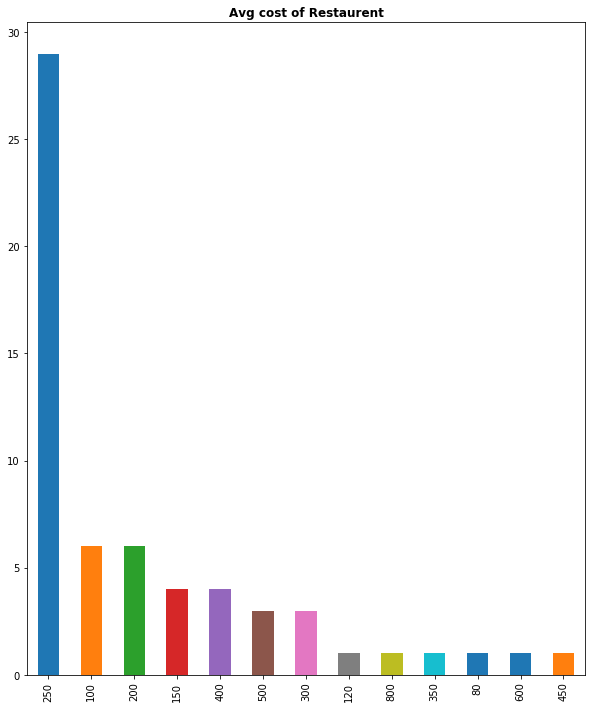

In [26]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [27]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

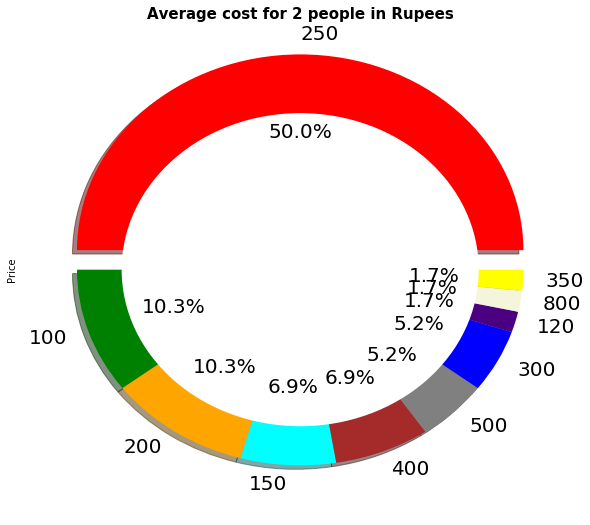

In [28]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 250